In [1]:
from disambiguation.core import Database
from disambiguation import config
from cPickle import load
%load_ext autoreload
%autoreload 2

individual_contributions_v2
newyork_combined_v2
usa_combined_v2
identities_v2
identities_adjacency_v2
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Identity Manager, initialize

In [2]:
Database.IdentityManager.table_name_identity_adjacency

'identities_adjacency_v2'

In [11]:
Database.IdentityManager.table_name_identities = 'identities_v2'
Database.IdentityManager.table_name_identity_adjacency = 'identities_adjacency_v2'

idm = Database.IdentityManager("USA")
idm.fetch_dict_id_2_identity()
idm.fetch_dict_identity_2_id()
idm.fetch_dict_identity_adjacency()

Table 'identities_v2' exists.
Table 'identities_adjacency_v2' exists.
select id,identity from identities_v2;
select id,identity from identities_v2;
SELECT identity1,identity2, no,maybe,yes from identities_adjacency_v2;


In [16]:
print idm.get_related_identities('UT-784')
print idm.get_ids('UT-645')
print idm.get_identity(2011624)

{u'IL-6037': (0.0, 2.0, 0.0), u'CA-20251': (1.0, 3.0, 0.0), u'MD-3112': (0.0, 1.0, 0.0), u'CA-20576': (0.0, 0.0, 3.5), u'MI-3862': (1.0, 2.0, 0.0), u'WA-3056': (1.0, 1.0, 0.0), u'OK-2147': (0.0, 1.0, 0.0), u'NC-2994': (0.0, 1.0, 0.0), u'OH-3907': (0.0, 1.0, 0.0), u'CO-2222': (0.0, 1.0, 0.0), u'SD-465': (0.0, 1.0, 0.0), u'MS-878': (0.0, 1.0, 0.0), u'TX-10901': (0.0, 1.0, 0.0)}
[16077067]
NH-18644


In [4]:
print idm.get_related_identities('CT-11869')
print idm.get_related_identities('AZ-12343')
print idm.get_related_identities('CT-11902')


{u'AZ-12343': (0.0, 6.0, 0.0)}
{u'OH-18141': (0.0, 1.0, 0.0), u'CT-11869': (0.0, 6.0, 0.0), u'CT-11902': (0.0, 2.0, 0.0)}
{u'TN-11960': (0.0, 2.0, 0.0), u'OH-18141': (0.0, 2.0, 0.0), u'ME-3148': (0.0, 1.0, 0.0), u'AZ-12343': (0.0, 2.0, 0.0)}


In [5]:
print idm.get_related_identities('CT-11869')
print idm.get_related_identities('AZ-12343')
print idm.get_related_identities('CT-11902')


{u'AZ-12343': (0.0, 6.0, 0.0)}
{u'OH-18141': (0.0, 1.0, 0.0), u'CT-11869': (0.0, 6.0, 0.0), u'CT-11902': (0.0, 2.0, 0.0)}
{u'TN-11960': (0.0, 2.0, 0.0), u'OH-18141': (0.0, 2.0, 0.0), u'ME-3148': (0.0, 1.0, 0.0), u'AZ-12343': (0.0, 2.0, 0.0)}


In [10]:
print idm.get_related_identities('CA-305293')
print idm.get_related_identities('KY-22089')

None
None


In [7]:
print idm.get_related_identities('FL-234677')
print idm.get_related_identities('MO-59800')


{u'MO-59800': (0.0, 16.0, 63.5), u'CO-73327': (0.0, 0.0, 9.0)}
{u'FL-234677': (0.0, 16.0, 63.5)}


In [6]:
print idm.get_linked_identities('FL-234677')
print idm.get_linked_identities('MO-59800')

set([u'CO-73327', u'MO-59800', 'FL-234677'])
set([u'CO-73327', 'MO-59800', u'FL-234677'])


In [12]:
print idm.get_related_identities('CA-305276')


{u'CA-305283': (0.0, 1.0, 0.0), u'NY-171608': (5.0, 0.0, 0.0)}


In [19]:
idm.dict_id_2_identity[2604598L]

KeyError: 2604598L

In [39]:
def get_neighborhood(identity, list_visited):
    X = idm.get_related_identities(identity)
    if not X: return 
    for neighbor,score in X.items():        
        if neighbor not in list_visited:
            list_visited.add(neighbor)
            get_neighborhood(neighbor,list_visited)
        
identity = 'MO-59800'
identity = 'WV-8214'
identity = 'KY-22089'
list_visited = set([identity])    
get_neighborhood(identity,list_visited)
print list_visited

set(['KY-22089'])


# Retrieve list of records 

In [20]:
retriever = Database.FecRetriever("usa_combined")
retriever.retrieve()

select NAME,CONTRIBUTOR_ZIP,ZIP_CODE,CONTRIBUTOR_STREET_1,CITY,STATE,EMPLOYER,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT,CMTE_ID,ENTITY_TP,id from usa_combined;


In [21]:
idm.dict_identity_adjacency.items()[:100]

In [6]:
idm.get_related_identities("CT-11869")

{u'AZ-12343': (0.0, 6.0, 0.0)}

In [23]:
idm.dict_identity_2_identities['CA-37201']

{u'WI-3596': (0.0, 1.0, 0.0)}

#Normalized USA Tokendata

In [17]:
filename = config.tokendata_file_template % ('USA', 'Normalized')
with open(filename) as f:
    tokendata = load(f)

In [6]:
tokendata.token_counts.items()[:1000]

#Normalized Tokens 

In [18]:
with open(config.normalized_attributes_file_template % 'utah') as f:
    norm = load(f)

In [20]:
tmp = [x['N_middle_name'] for y,x in norm.iteritems()]
# [x for x in tmp if x]


In [22]:
norm[6543205]

{'N_address': [],
 'N_employer': u'ZIONS BANK',
 'N_first_name': u'ASCOTT',
 'N_last_name': u'ANDERSON',
 'N_middle_name': u'',
 'N_occupation': u'BANKER',
 'N_zipcode': []}

In [25]:
from nameparser import HumanName
name = HumanName("ANDERSON, ALDON SCOTT")
name

<HumanName : [
	Title: '' 
	First: 'ALDON' 
	Middle: 'SCOTT' 
	Last: 'ANDERSON' 
	Suffix: ''
]>

# Export related and linked identities to file 

In [4]:
idm.export_linked_identities_csv()

In [5]:
idm.export_related_identities_csv()

In [33]:
a = set([1,2,3])
a.discard(1)
a

{2, 3}

In [34]:
3+4

7

In [10]:
import pandas as pd
y = pd.read_csv('/nfs/home/navid/data/FEC/zubin/compustat_riskmetrics_forFECmatch.csv')
data = y.groupby('director_detail_id', as_index=False).first()
data

,director_detail_id,ticker,firstname,lastname,year,rt_id,cusip.x,companyname.x,meetingdate,firstname.w.middle,...,address,city,state,zip,sicdesc,naicsdesc,inddesc,naics,spindex,sic
0,1,fl,james,preston,2012,NaN,344849104,"foot locker, inc.",20120516,james e.,...,112 West 34th Street,New York,NY,10120,SHOE STORES,Shoe Stores,Apparel Retail,448210,2550,5661
1,3,ew,philip,neal,2006,5959,28176e,edwards lifesciences corporation,13279,philip m.,...,One Edwards Way,Irvine,CA,92614,"ORTHO,PROSTH,SURG APPL,SUPLY",Surgical Appliance and Supplies Manufacturing,Health Care Equipment,339113,3510,3842
2,4,avy,peter,mullin,2011,NaN,53611109,avery dennison corporation,20110428,peter w.,...,207 Goode Avenue,Glendale,CA,91203,"CONVRT PAPR,PAPRBRD,EX BOXES",Paper Bag and Coated and Treated Paper Manufac...,Paper Packaging,322220,1510,2670
3,5,avy,richard,ferry,2008,4644,53611109,avery dennison corp.,13993,richard m.,...,207 Goode Avenue,Glendale,CA,91203,"CONVRT PAPR,PAPRBRD,EX BOXES",Paper Bag and Coated and Treated Paper Manufac...,Paper Packaging,322220,1510,2670
4,6,cbr,george,sissel,2007,5322,17163b102,"ciber, inc.",20070503,george a.,...,"6363 South Fiddlers Green Circle, Suite",Greenwood Village,CO,80111,"CMP PROGRAMMING,DATA PROCESS",Other Computer Related Services,IT Consulting & Other Services,541519,4510,7370
5,9,ndaq,h,baldwin,2010,23770,631103108,"the nasdaq omx group, inc.",20100527,h. furlong,...,"One Liberty Plaza, 165 Broadway",New York,NY,10006,SECURITY & COMMODITY BROKERS,Securities and Commodity Exchanges,Specialized Finance,523210,4020,6200
6,12,cah,john,mccoy,2007,12190,141487ac2,"cardinal health, inc.",20071107,john b.,...,7000 Cardinal Place,Dublin,OH,43017,DRUGS AND PROPRIETARY-WHSL,Drugs and Druggists' Sundries Merchant Wholesa...,Health Care Distributors,424210,3510,5122
7,13,axp,robert,walter,2012,12190,25816109,american express company,20120430,robert d.,...,200 Vesey Street,New York,NY,10285,FINANCE SERVICES,"Financial Transactions Processing, Reserve, an...",Consumer Finance,522320,4020,6199
8,14,bac,charles,gifford,2010,NaN,60505104,bank of america corporation,20100428,charles k.,...,"Bank of America Corporate Center, 100 N",Charlotte,NC,28255,COMMERCIAL BANKS,Commercial Banking,Diversified Banks,522110,4010,6020
9,15,gnw,thomas,wheeler,2009,22827,37247d106,"genworth financial, inc.",20090513,thomas b.,...,6620 West Broad Street,Richmond,VA,23230,LIFE INSURANCE,Direct Life Insurance Carriers,Multi-line Insurance,524113,4030,6311


In [29]:
x = data.irow(10)
x.tolist()
data.columns

Index([u'director_detail_id', u'ticker', u'firstname', u'lastname', u'year', u'rt_id', u'cusip.x', u'companyname.x', u'meetingdate', u'firstname.w.middle', u'fullname.x', u'age', u'female', u'ethnicity', u'indexname', u'classification', u'country_of_empl', u'primary_employer', u'prititle', u'dirsince', u'num_of_shares', u'outside_public_boards', u'pcnt_ctrl_votingpower', u'relative_yn', u'year_term_ends', u'companyid', u'personid', u'companyname.y', u'yearborn', u'fullname.y', u'filingdate', u'proid', u'coname', u'cusip.y', u'exchange', u'address', u'city', u'state', u'zip', u'sicdesc', u'naicsdesc', u'inddesc', u'naics', u'spindex', u'sic'], dtype='object')

In [18]:
print x.tolist()

[16.0, 'pnc', 'paul', 'chellgren', 2010, nan, '693475105', 'the pnc financial services group, inc.', '20100427', 'paul w.', 'paul w. chellgren', 68.0, nan, 'caucasian', 's&p 500', 'i', 'united states', 'snow phipps group, llc', 'financial services', '1995', 37592.0, '0', nan, 0, 2011.0, 294585, 252341, 'the pnc financial services group, inc.', 1943.0, 'paul chellgren', 20110316, 612387, 'PNC FINANCIAL SVCS GROUP INC', '69347510', 'NYS', 'One PNC Plaza, 249 Fifth Avenue', 'Pittsburgh', 'PA', '15222', 'COMMERCIAL BANKS', 'Commercial Banking', 'Regional Banks', 522110.0, 4010.0, 6020.0]


In [30]:
open('navidnavid.txt','w').close()


# Analyzing the final handcoded results from Caorlina and Matt. The product here will be the final statistics we'll report

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Comparing Navid against ground truth 

In [99]:
filename = '/nfs/home/navid/data/FEC/Bonica/all-scores-navid-ground.csv'
data = pd.read_csv(filename, skiprows=2, dtype = np.float64)
print data.columns

Index([u'Navid', u'Carolina', u'Matt', u'Carolina or Matt', u'Ambiguous', u'Correct', u'Falsely included (type1)', u'Missed (type2)'], dtype='object')


In [100]:
data

,Navid,Carolina,Matt,Carolina or Matt,Ambiguous,Correct,Falsely included (type1),Missed (type2)
0,86,87,87,87,0,86,0,1
1,9,10,10,10,0,9,0,1
2,20,21,21,21,0,20,0,1
3,14,17,17,17,0,14,0,3
4,10,10,10,10,0,10,0,0
5,272,274,273,274,1,271,0,2
6,2,2,2,2,0,2,0,0
7,62,66,65,66,1,57,5,8
8,2,4,4,4,0,2,0,2
9,27,27,27,27,0,27,0,0


In [102]:
# t1 = (data['Falsely included (type1)'] / data['Carolina or Matt'] ).mean()
t1 = (data['Falsely included (type1)'] / data['Matt'] ).mean()
print "type 1 error: ", t1

type 1 error:  0.00280433078091


In [61]:
t2 = (data['Missed (type2)'] / data['Carolina or Matt'] ).mean()
print "type 2 error: ", t2

type 2 error:  0.0564273558967


## Comparing Navid against Bonica. Here we base the calculations on records found in both. 

In [78]:
filename = '/nfs/home/navid/data/FEC/Bonica/all-scores-navid-bonica.csv'
data = pd.read_csv(filename, skiprows=2, dtype = np.float64)
print data.columns

Index([u'Carolina or Matt', u'Navid', u'Bonica', u'Ambiguous', u'Correct', u'Falsely included', u'Missed', u'Correct.1', u'Falsely included.1', u'Missed.1'], dtype='object')


In [96]:
list_indexes = range(94)
list_indexes.remove(83)
print list_indexes

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93]


In [97]:
data[80:85]


,Carolina or Matt,Navid,Bonica,Ambiguous,Correct,Falsely included,Missed,Correct.1,Falsely included.1,Missed.1
80,14,12,12,1,12,0,1,12,0,1
81,65,64,57,1,64,0,0,56,0,8
82,0,0,0,0,0,0,0,0,0,0
83,1,3,1,0,1,2,0,1,0,0
84,13,13,13,0,13,0,0,13,0,0


In [98]:
# Filter the data if desired
data = data.iloc[list_indexes]
data = data[ data['Carolina or Matt'] > 0 ]

totals = data['Carolina or Matt']

t1_navid = (data['Falsely included'] / totals).mean()
t2_navid = (data['Missed'] / totals).mean()

t1_bonica = (data['Falsely included.1'] / totals).mean()
t2_bonica = (data['Missed.1'] / totals).mean()


print t1_navid, t2_navid
print t1_bonica, t2_bonica

0.00189569167466 0.0629475996986
0.00310587395171 0.0637839855163


In [52]:
data['Falsely included']/totals

0     0.000000
1     0.000000
2     0.000000
3     0.000000
4     0.000000
5     0.000000
7     0.080645
8     0.000000
9     0.000000
11    0.000000
12    0.000000
13    0.000000
14    0.000000
15    0.000000
16    0.000000
...
74    0.000000
75    0.000000
76    0.000000
78    0.000000
79    0.000000
80    0.000000
81    0.000000
84    0.000000
87    0.000000
88    0.036697
89    0.000000
90    0.000000
91    0.000000
92    0.000000
93    0.000000
Length: 76, dtype: float64

(array([83,  0,  0,  0,  0,  0,  0,  0,  0,  1]),
 array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6,  1.8,  2. ]),
 <a list of 10 Patch objects>)

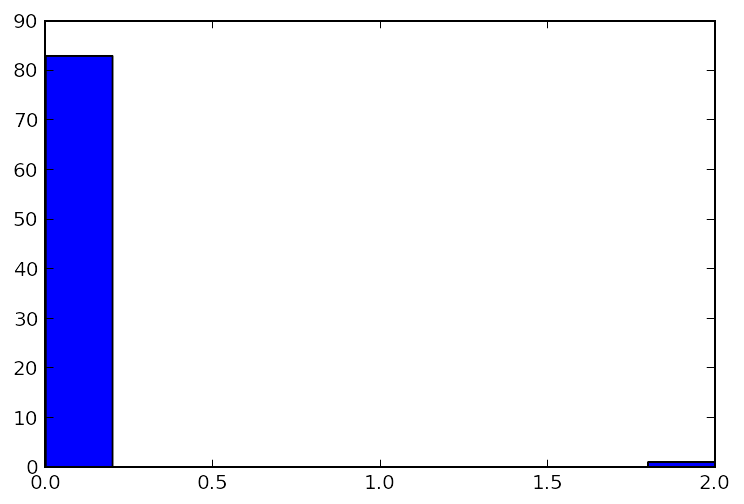

In [37]:
plt.hist(data['Falsely included']/totals)

(array([82,  1,  0,  0,  0,  0,  0,  0,  0,  1]),
 array([ 0.  ,  0.02,  0.04,  0.06,  0.08,  0.1 ,  0.12,  0.14,  0.16,
         0.18,  0.2 ]),
 <a list of 10 Patch objects>)

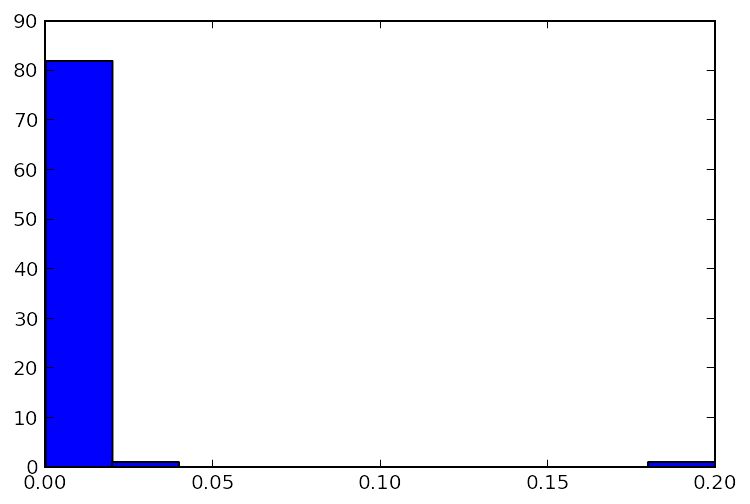

In [36]:
plt.hist(data['Falsely included.1']/totals)

## A different way of computing the stats: sum first, divide second 

In [66]:


print data['Falsely included'].sum()/ float(totals.sum())
print data['Missed'].sum()/ float(totals.sum())

print 

print data['Falsely included.1'].sum()/ float(totals.sum())
print data['Missed.1'].sum()/ float(totals.sum())


0.002357378595
0.0671852899576

0.0040075436115
0.0346534653465


In [43]:
totals.sum()

4250